In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import model_service as ms

In [19]:
RANDOM_STATE=2025
dataset = pd.read_csv('../data/numerical_dataset_original.csv')
dataset.drop(['cik', 'subset', 'ticker', 'Fiscal Period'], axis=1, inplace=True)
flatten = True
enriched = True
oversampled = False

X_train, y_train, X_test, y_test = ms.get_data(dataset, flatten, enriched, oversampled, random_state=RANDOM_STATE)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4019, 150), (4019,), (447, 150), (447,))

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['label'] = y_train.values
pca_df

,PC1,PC2,label
0,12.785183,-1.537759,False
1,0.613966,-0.097749,False
2,15.716268,1.302419,False
3,-1.568937,0.096072,False
4,5.606479,0.343334,False
...,...,...,...
4014,-1.388848,0.392576,False
4015,0.498030,-0.159777,False
4016,0.092225,0.312948,False
4017,-1.377237,0.204923,False


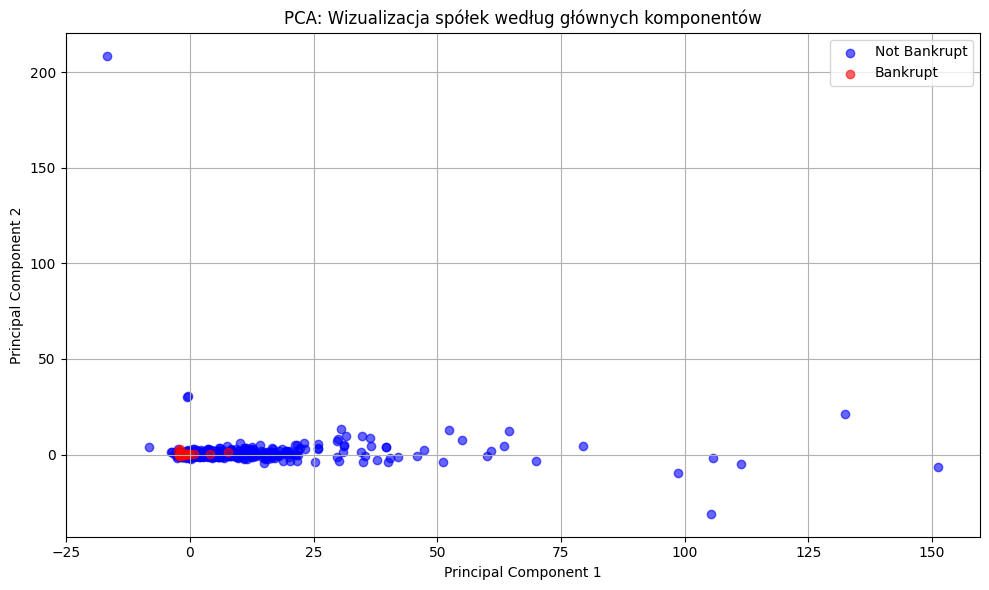

In [21]:
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Not Bankrupt', 1: 'Bankrupt'}

# Rysujemy najpierw Not Bankrupt (tło)
subset_not = pca_df[pca_df['label'] == 0]
plt.scatter(subset_not['PC1'], subset_not['PC2'], 
            c=colors[0], label=labels[0], alpha=0.6)

# Potem Bankrupt (nad warstwą niebieską)
subset_bankrupt = pca_df[pca_df['label'] == 1]
plt.scatter(subset_bankrupt['PC1'], subset_bankrupt['PC2'], 
            c=colors[1], label=labels[1], alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Wizualizacja spółek według głównych komponentów')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

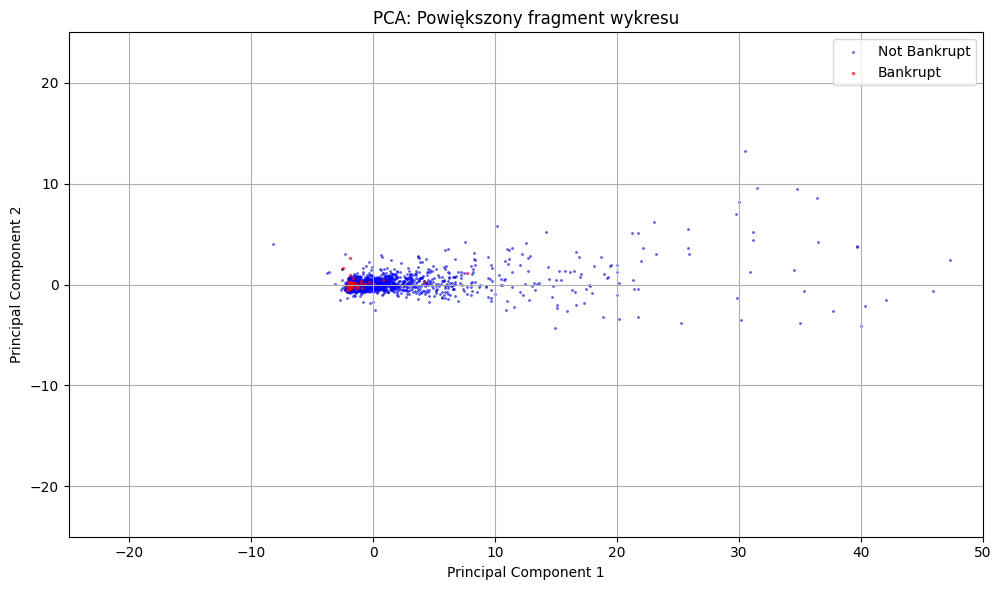

In [22]:
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Not Bankrupt', 1: 'Bankrupt'}

# Rysujemy najpierw Not Bankrupt
subset_not = pca_df[pca_df['label'] == 0]
plt.scatter(subset_not['PC1'], subset_not['PC2'], 
            c=colors[0], label=labels[0], alpha=0.6, linewidth=0.5, s=2)

# Potem Bankrupt
subset_bankrupt = pca_df[pca_df['label'] == 1]
plt.scatter(subset_bankrupt['PC1'], subset_bankrupt['PC2'], 
            c=colors[1], label=labels[1], alpha=0.6, s=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Powiększony fragment wykresu')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Ustawiamy zakresy osi (zoom)
plt.xlim(-25, 50)
plt.ylim(-25, 25)

plt.show()

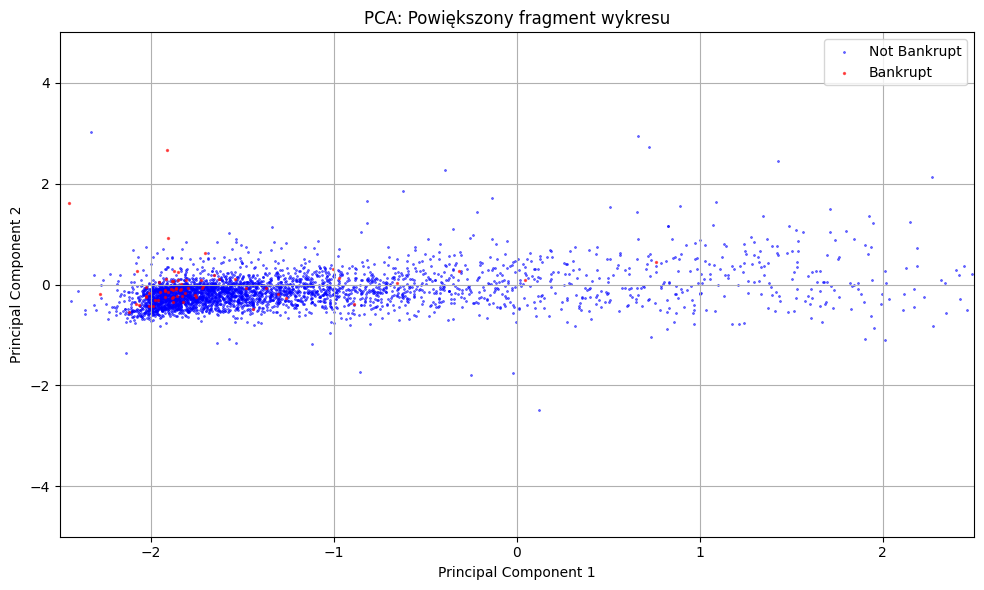

In [23]:
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Not Bankrupt', 1: 'Bankrupt'}

# Rysujemy najpierw Not Bankrupt
subset_not = pca_df[pca_df['label'] == 0]
plt.scatter(subset_not['PC1'], subset_not['PC2'], 
            c=colors[0], label=labels[0], alpha=0.6, linewidth=0.5, s=2)

# Potem Bankrupt
subset_bankrupt = pca_df[pca_df['label'] == 1]
plt.scatter(subset_bankrupt['PC1'], subset_bankrupt['PC2'], 
            c=colors[1], label=labels[1], alpha=0.6, s=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Powiększony fragment wykresu')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Ustawiamy zakresy osi (zoom)
plt.xlim(-2.5, 2.5)
plt.ylim(-5, 5)

plt.show()